<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/agujaDeBuffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Método para el cálculo de π: Aguja de Buffon**

Este método fue ideado por el matemático francés Georges-Louis Leclerc, posteriomente conocido como Conde de Buffon, en el siglo XVIII. El principio básico del experimento es lanzar una aguja sobre una superficie con líneas paralelas y analizar la probabilidad de que la aguja cruce una de las líneas.

Supóngase entonces una superficie plana con líneas paralelas dibujadas a una distancia constante ⅅ entre ellas. Además, supóngase tener una cantidad 𝑛 de agujas de longitud 𝐿, donde 𝐿 ≤ ⅅ.

El experimento consiste en lanzar las agujas sobre la superficie de manera aleatoria y registrar la cantidad de aquellas que crucen una de las líneas.

**Demostración del método**

Designemos a 𝒀 como la distancia entre el punto medio de la aguja y la paralela más próxima, y θ como el ángulo agudo formado entre la aguja, o su prolongación dicha paralela. Estas variables estarán acotadas de la siguiente manera:

0 ≤ 𝘠 ≤ ⅅ/2

0 ≤ θ ≤ π

Todas las posiciones posibles de una aguja se pueden expresar como un rectángulo con los lados de longitud π y ⅅ/2. Asimismo, la condición necesaria para determinar si se produjo la intersección entre la aguja y una línea
paralela es:

𝘠 ≤ 𝐿 sin(θ) / 2

De esta manera, la probabilidad de que una aguja cruce una línea paralela está dada por el cociente:

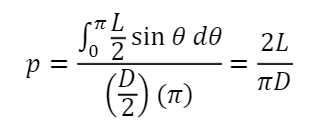

Cono vemos, el numerador se obtiene integrando sobre todas las posibles posiciones y ángulos de la aguja. Por otro lado, la probabilidad experimental de que la aguja cruce una línea paralela es:

𝑝=𝐶/𝑁

Donde 𝐶 es la cantidad de agujas que cruzan una línea paralela y 𝑁 la cantidad total de agujas lanzadas.

Por último, igualamos la probabilidad experimental y teórica para poder estimar el valor de pi:
π ≈ 2𝐿/\𝐶

Las características del experimento son las siguientes:

* La aguja tiene una longitud conocida $L$.

* Las líneas paralelas están separadas por una distancia $d$, donde $d \leq L$.

* La aguja se lanza al azar sobre la superficie y se registra si cruza alguna línea o no.

El objetivo del experimento es determinar la probabilidad $P$ de que la aguja cruce una de las líneas entre las franjas paralelas.

La fórmula que relaciona la probabilidad $P$ es

$$ P=\frac{2L}{\pi d} $$

Dado que estamos hablando de la probailidad de que la aguja cruce la linea, podemos decir que se trata de un experimento de bernoulli, ya que estamos hablando de éxitos y fracasos.

$$
x_i =
\begin{cases}
1 & \text{la aguja cruza una línea } \\
0 & \text{la aguja no cruza una línea }
\end{cases}
$$
* Sabemos que la media $\mu$ de la distribución de Bernoulli de $X_i$ es P.

$$ E[X_i] = \mu = 1(P) + 0(1-P) = P$$

* Y la varianza

$$ V[X_i] = \sigma^2 = P - P^2 = P(1-P)$$

Ademas sabemos que:
$$ P = \frac{2L}{\pi d} ⟹ \pi = \frac{2L}{Pd}$$

Ahora bien, para aproximar más el valor estimado a su valor real es necesario aumentar el número de veces que se realiza el experimento, por ejemplo, si queremos que el estimador difiera en una cantidad menor que 0.1, con una seguridad del 95% podemos expresar esto de la siguiente manera:
$$
P(|\hat{pi}-\pi| \leq 0.1 ) = 0.95
$$
La cual se puede reescribir como
$$
P(\pi - 0.1 \leq \frac{\hat{\pi}}{n} \leq \pi + 0.1) = 0.95
$$

Para determinar el tamaño de la muestra podemos aplicar la desigualdad de Chevisev


MEDIA
$$ \mu = P = \frac{2L}{\pi d}$$

VARIANZA
$$ \sigma^2 = P(1-P) $$

* El estimador de $\pi$ es
$$\hat{\pi} = \frac{2LN}{dN_c}$$
donde $N_c$ es igual al número de éxitos ( la aguja cruza la linea)

$$ P(|\hat{\pi}-\pi| \geq \epsilon) \leq \delta$$

$$ P(|\hat{P}-P| \geq k\sigma) \leq \frac{1}{k^2}$$
donde $k=\frac{\epsilon}{\sigma}$

* Asi relacionamos a $\epsilon$ con $N$, sabemos que $\hat{P} = \frac{N_c}{N}$, la varianza de $\hat{P}$ es $\frac{\sigma^2}{N}$ asi vimos que para la varianza de $\hat{\pi}$ es igual a:

$$ \sigma^2 = P(1-P) $$

lo que implica que

$$\frac{\epsilon}{\sqrt{\frac{P(1-P)}{N}}} \geq \sqrt{\frac{1}{\delta}}$$

resolviendo para $N$

$$ ⟹ \epsilon \geq \sqrt{\frac{P(1-P)}{N\delta}} $$

$$ ⟹ N \geq \frac{P(1-P)}{\epsilon^2 \delta}$$

Asi obtendremos el valor de $N$ aproximadamente.

Aplicamos la formula para encontrar N y obtenemos

$$ N \geq \frac{\frac{2\pi-4}{\pi^2}}{\epsilon^2 \delta}  = \frac{2\pi -4}{\pi^2 \epsilon^2 \delta }$$

$$ N \geq \frac{2\pi -4}{\pi^2 (0.01)^2 (0.05) }$$

$$  N \geq 46267.0075$$

Asi necesariamente necesitariamo al menos 46,267 lanzamientos para la estimación de $\pi$ .

# **Implementación en Python**

Importación de modulos

In [15]:
import random # Generación de números aleatorios
import math # Para ident. trigonométricas & pi
import time # Para el registro de tiempo
import matplotlib.pyplot as plt # Para la visualización
import numpy as np

Función que posiciona una aguja en una posición aleatoria
y comprueba si corta o no una línea, siguiendo el diagrama A y la ecuación 1

Definimos un theta aleatorio para grenerar una inclinacion aleatoria de la aguja, además, con ello es facil calcular si esta cruza o una las lineas paralelas, ya que es facil aplicar el teorema de pitagoras

In [16]:
def cruce(L, D):
    x = D * random.random() # Posición aleatoria entre 0 - D
    theta = math.pi * random.random() / 2 # Ángulo aleatorio entre 0 - pi/2
    y = L * math.cos(theta) # Proyección de la longitud sobre el eje perpendicular
    return y > x # Condición de cruce

Función que aproxima el valor de π de acuerdo a una cantidad dada de agujas y los valores de tamaño de aguja (L) y distancia entre líneas (D)

In [17]:
def estimate_pi(needles, L, D):
    N = 0  # Variable de paro cuando N=needles
    C = 0  # Cantidad de agujas que cruzan una línea
    piValues = []  # Lista para almacenar las estimaciones de pi
    prob = []
    for i in range(needles):
        N += 1
        if cruce(L, D):
            C += 1 # Aumentar el contador si una aguja cruza
            prob.append(C/(i+1))
        if C > 0:
            piEstimated = 2 * L * N / (D * C) # Estimación de pi con los valores actuales
            piValues.append(piEstimated) # Almacenamiento del nuevo valor
    return piValues, prob


Parámetros del experimento

In [18]:
# Parámetros
agujas = 10000  # Cantidad de agujas que serán "lanzadas"
L = 0.25  # Longitud de aguja (<=1)
D = 0.75  # Distancia entre líneas horizontales (<=1)

Estimación de π y cálculo de error

In [19]:
# Estimación de pi
[piValues,prob] = estimate_pi(agujas, L, D)
pi = piValues[-1] # Nos quedamos con el último valor de pi estimado
relativeError = abs(pi - math.pi)/math.pi # Cálculo del error relativo

print(f'Valor de pi estimado: {pi}')
print(f'Cantidad de agujas lanzadas: {agujas}')
print(f'Error relativo: {relativeError}')

Valor de pi estimado: 3.1181789834736513
Cantidad de agujas lanzadas: 10000
Error relativo: 0.007452802669813923


Ahora, graficamos la probailidad de éxito. La cual converge muy rapidamente.

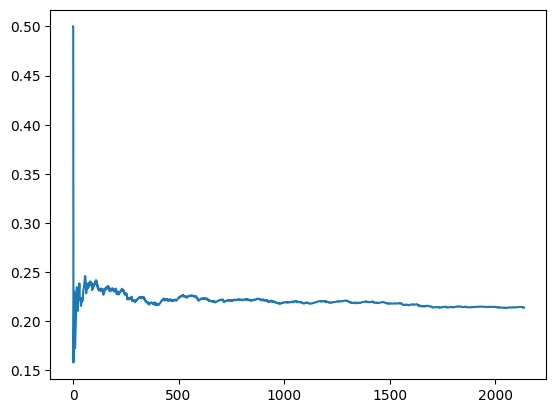

In [20]:
plt.plot(prob)

En la grafica siguiente visualizamos la convergencia del valor de pi

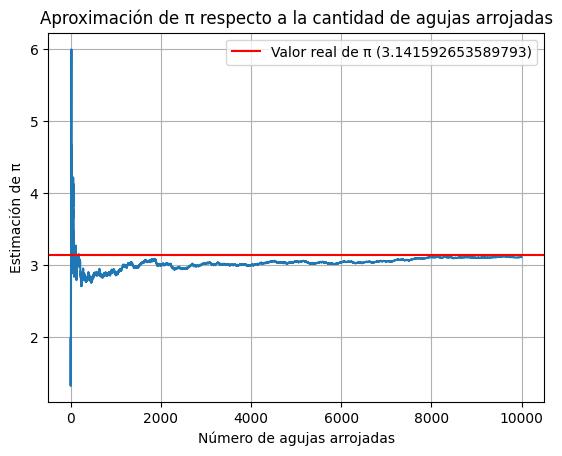

In [21]:
plt.plot(range(1, len(piValues) + 1), piValues)
plt.axhline(y=math.pi, color='r', linestyle='-', label=f'Valor real de π ({math.pi})')
plt.xlabel('Número de agujas arrojadas')
plt.ylabel('Estimación de π')
plt.title('Aproximación de π respecto a la cantidad de agujas arrojadas')
plt.legend()
plt.grid(True)
plt.show()

Ahora, dado que estamos hablando de un prblema de simulacion. es necesario repetir el experimento más veces, py de esta forma, será más sencillo vizualizar que se parece más a una distribucion conocida y más sencilla de realizar analisis.

In [22]:
def modelo(n):
    lista=[]
    L = 0.25  # Longitud de aguja (<=1)
    D = 0.75
    for i in range(n):
        [s,e] = estimate_pi(1000,L,D)
        lista.append(np.mean(s))
    return lista

In [24]:
Y = modelo(46267)

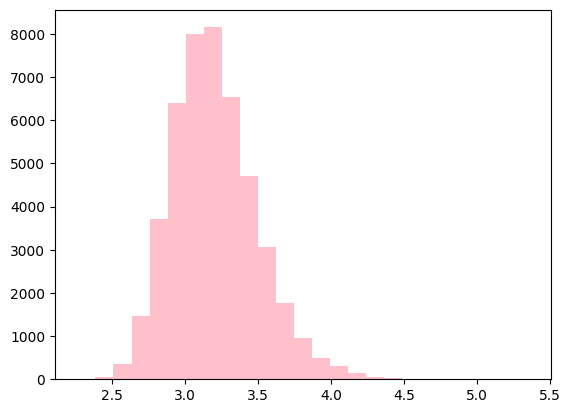

In [25]:
plt.hist(Y,bins = 25, color = "pink")
plt.show()